In [1]:
# Import necessary libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# changing directory
os.chdir(r"C:\Users\Virginia Phan\Desktop\DS PROJECTS\Delivery Duration Prediction")

In [3]:
# generating random seed
np.random.seed(50)

In [4]:
# read data
historical_data = pd.read_csv("historical_data.csv")
historical_data.head(10)

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0
5,3.0,2015-01-28 20:30:38,2015-01-28 21:08:58,5477,NaN,1.0,3,5000,3,1500,1900,2.0,2.0,2.0,446,338.0
6,3.0,2015-01-31 02:16:36,2015-01-31 02:43:00,5477,NaN,1.0,2,3900,2,1200,2700,10.0,9.0,9.0,446,638.0
7,3.0,2015-02-12 03:03:35,2015-02-12 03:36:20,5477,NaN,1.0,4,4850,4,750,1800,7.0,8.0,7.0,446,626.0
8,2.0,2015-02-16 00:11:35,2015-02-16 00:38:01,5477,indian,3.0,4,4771,3,820,1604,8.0,6.0,18.0,446,289.0
9,3.0,2015-02-18 01:15:45,2015-02-18 02:08:57,5477,NaN,1.0,2,2100,2,700,1200,2.0,2.0,2.0,446,715.0


In [5]:
historical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 16 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   market_id                                     196441 non-null  float64
 1   created_at                                    197428 non-null  object 
 2   actual_delivery_time                          197421 non-null  object 
 3   store_id                                      197428 non-null  int64  
 4   store_primary_category                        192668 non-null  object 
 5   order_protocol                                196433 non-null  float64
 6   total_items                                   197428 non-null  int64  
 7   subtotal                                      197428 non-null  int64  
 8   num_distinct_items                            197428 non-null  int64  
 9   min_item_price                                19

In [6]:
# target columns created_at and actual_delivery_time needs to be converted into datetime for further analyis

In [7]:
# creating the target variable for regression
from datetime import datetime
historical_data['created_at'] = pd.to_datetime(historical_data['created_at'])
historical_data['actual_delivery_time'] = pd.to_datetime(historical_data['actual_delivery_time'])
historical_data['actual_total_delivery_duration'] = (historical_data['actual_delivery_time'] - historical_data['created_at']).dt.total_seconds()

In [8]:
historical_data.head(10)

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,actual_total_delivery_duration
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0,3779.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0,4024.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0,1781.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0,3075.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0,2390.0
5,3.0,2015-01-28 20:30:38,2015-01-28 21:08:58,5477,NaN,1.0,3,5000,3,1500,1900,2.0,2.0,2.0,446,338.0,2300.0
6,3.0,2015-01-31 02:16:36,2015-01-31 02:43:00,5477,NaN,1.0,2,3900,2,1200,2700,10.0,9.0,9.0,446,638.0,1584.0
7,3.0,2015-02-12 03:03:35,2015-02-12 03:36:20,5477,NaN,1.0,4,4850,4,750,1800,7.0,8.0,7.0,446,626.0,1965.0
8,2.0,2015-02-16 00:11:35,2015-02-16 00:38:01,5477,indian,3.0,4,4771,3,820,1604,8.0,6.0,18.0,446,289.0,1586.0
9,3.0,2015-02-18 01:15:45,2015-02-18 02:08:57,5477,NaN,1.0,2,2100,2,700,1200,2.0,2.0,2.0,446,715.0,3192.0


In [9]:
# creating new feature 'estimated_non_prep_duration'
historical_data['estimated_non_prep_duration'] = historical_data['estimated_store_to_consumer_driving_duration'] + historical_data['estimated_order_place_duration']
historical_data.head(10)

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,actual_total_delivery_duration,estimated_non_prep_duration
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0,3779.0,1307.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0,4024.0,1136.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0,1781.0,1136.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0,3075.0,735.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0,2390.0,1096.0
5,3.0,2015-01-28 20:30:38,2015-01-28 21:08:58,5477,NaN,1.0,3,5000,3,1500,1900,2.0,2.0,2.0,446,338.0,2300.0,784.0
6,3.0,2015-01-31 02:16:36,2015-01-31 02:43:00,5477,NaN,1.0,2,3900,2,1200,2700,10.0,9.0,9.0,446,638.0,1584.0,1084.0
7,3.0,2015-02-12 03:03:35,2015-02-12 03:36:20,5477,NaN,1.0,4,4850,4,750,1800,7.0,8.0,7.0,446,626.0,1965.0,1072.0
8,2.0,2015-02-16 00:11:35,2015-02-16 00:38:01,5477,indian,3.0,4,4771,3,820,1604,8.0,6.0,18.0,446,289.0,1586.0,735.0
9,3.0,2015-02-18 01:15:45,2015-02-18 02:08:57,5477,NaN,1.0,2,2100,2,700,1200,2.0,2.0,2.0,446,715.0,3192.0,1161.0


In [10]:
# creating new feature 'busy_dashers_ratio'
historical_data['busy_dashers_ratio'] = historical_data['total_busy_dashers']/historical_data['total_onshift_dashers']
historical_data['busy_dashers_ratio'].head(10)

0    0.424242
1    2.000000
2    0.000000
3    1.000000
4    1.000000
5    1.000000
6    0.900000
7    1.142857
8    0.750000
9    1.000000
Name: busy_dashers_ratio, dtype: float64

In [11]:
# check ids to decide whether to encode or not
historical_data['market_id'].nunique()

6

In [12]:
historical_data['store_id'].nunique()

6743

In [13]:
historical_data['order_protocol'].nunique()

7

In [14]:
historical_data['store_primary_category']

0         american
1          mexican
2              NaN
3              NaN
4              NaN
            ...   
197423        fast
197424        fast
197425        fast
197426    sandwich
197427    sandwich
Name: store_primary_category, Length: 197428, dtype: object

In [15]:
# create dictionary with most repeated categories of each store to fill null rows where it is possible
store_id_unique = historical_data['store_id'].unique().tolist()
store_id_and_category = {store_id: historical_data[historical_data['store_id'] == store_id].store_primary_category.mode()
                        for store_id in store_id_unique}
store_id_and_category

{1845: 0    american
 dtype: object,
 5477: 0     indian
 1    mexican
 dtype: object,
 2841: 0    italian
 dtype: object,
 4139: 0    mexican
 dtype: object,
 5058: 0    italian
 dtype: object,
 4149: 0    sandwich
 1        thai
 dtype: object,
 3201: 0    cafe
 dtype: object,
 5054: 0    italian
 dtype: object,
 2004: 0    american
 dtype: object,
 1984: 0    chinese
 dtype: object,
 4905: 0    mexican
 dtype: object,
 1698: 0    sandwich
 dtype: object,
 1936: 0    singaporean
 dtype: object,
 6015: 0    burger
 dtype: object,
 976: 0    breakfast
 dtype: object,
 5081: 0    mediterranean
 dtype: object,
 1019: 0    chinese
 dtype: object,
 3994: 0    japanese
 dtype: object,
 6395: 0    cafe
 dtype: object,
 3879: Series([], dtype: object),
 6517: 0    american
 dtype: object,
 6584: 0    catering
 dtype: object,
 4003: 0    mexican
 dtype: object,
 1848: 0    sandwich
 dtype: object,
 3654: 0    filipino
 dtype: object,
 6241: 0    convenience-store
 dtype: object,
 1521: 0    am

In [16]:
# define function to fill null value of store_primary_category according to store_id
def fill(store_id):
    ### Return primary store category from dictionary ### 
    try:
        return store_id_and_category[store_id].values[0]
    except:
        return np.nan

# fill null values
historical_data['nan_free_store_primary_category'] = historical_data.store_id.apply(fill)
    

In [17]:
historical_data[{'store_id', 'store_primary_category', 'nan_free_store_primary_category'}]

,nan_free_store_primary_category,store_primary_category,store_id
0,american,american,1845
1,indian,mexican,5477
2,indian,NaN,5477
3,indian,NaN,5477
4,indian,NaN,5477
...,...,...,...
197423,fast,fast,2956
197424,fast,fast,2956
197425,fast,fast,2956
197426,sandwich,sandwich,3630


In [18]:
# creating dummies for 'order_protocol'
order_protocol_dummies = pd.get_dummies(historical_data.order_protocol)
order_protocol_dummies = order_protocol_dummies.add_prefix('order_protocol_')
order_protocol_dummies.head(10)

,order_protocol_1.0,order_protocol_2.0,order_protocol_3.0,order_protocol_4.0,order_protocol_5.0,order_protocol_6.0,order_protocol_7.0
0,1,0,0,0,0,0,0
1,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0
5,1,0,0,0,0,0,0
6,1,0,0,0,0,0,0
7,1,0,0,0,0,0,0
8,0,0,1,0,0,0,0
9,1,0,0,0,0,0,0


In [19]:
# creating dummies for 'market_id'
market_id_dummies = pd.get_dummies(historical_data.market_id)
market_id_dummies = market_id_dummies.add_prefix('market_id_')
market_id_dummies.head(10)

,market_id_1.0,market_id_2.0,market_id_3.0,market_id_4.0,market_id_5.0,market_id_6.0
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,1,0,0,0
3,0,0,1,0,0,0
4,0,0,1,0,0,0
5,0,0,1,0,0,0
6,0,0,1,0,0,0
7,0,0,1,0,0,0
8,0,1,0,0,0,0
9,0,0,1,0,0,0


In [20]:
# creating dummies for 'store_primary_category'
store_primary_category_dummies = pd.get_dummies(historical_data.nan_free_store_primary_category)
store_primary_category_dummies = store_primary_category_dummies.add_prefix('category_')
store_primary_category_dummies.head(10)

,category_afghan,category_african,category_alcohol,category_alcohol-plus-food,category_american,category_argentine,category_asian,category_barbecue,category_belgian,category_brazilian,...,category_southern,category_spanish,category_steak,category_sushi,category_tapas,category_thai,category_turkish,category_vegan,category_vegetarian,category_vietnamese
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
# drop some columns created_at, market_id, store_id, store_primary_category, actual_delivery_delivery_duration
train_df = historical_data.drop(columns = ['created_at', 'market_id', 'store_id', 'store_primary_category', 
                                        'actual_delivery_time',
                                          'nan_free_store_primary_category', 'order_protocol'])
train_df.head(10)

,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,actual_total_delivery_duration,estimated_non_prep_duration,busy_dashers_ratio
0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0,3779.0,1307.0,0.424242
1,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0,4024.0,1136.0,2.000000
2,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0,1781.0,1136.0,0.000000
3,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0,3075.0,735.0,1.000000
4,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0,2390.0,1096.0,1.000000
5,3,5000,3,1500,1900,2.0,2.0,2.0,446,338.0,2300.0,784.0,1.000000
6,2,3900,2,1200,2700,10.0,9.0,9.0,446,638.0,1584.0,1084.0,0.900000
7,4,4850,4,750,1800,7.0,8.0,7.0,446,626.0,1965.0,1072.0,1.142857
8,4,4771,3,820,1604,8.0,6.0,18.0,446,289.0,1586.0,735.0,0.750000
9,2,2100,2,700,1200,2.0,2.0,2.0,446,715.0,3192.0,1161.0,1.000000


In [22]:
# concat train_df with dummies df
train_df = pd.concat([train_df, order_protocol_dummies, market_id_dummies, store_primary_category_dummies], axis = 1)
# align dtype over dataset
train_df = train_df.astype('float32')
train_df.head(10)

,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,...,category_southern,category_spanish,category_steak,category_sushi,category_tapas,category_thai,category_turkish,category_vegan,category_vegetarian,category_vietnamese
0,4.0,3441.0,4.0,557.0,1239.0,33.0,14.0,21.0,446.0,861.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1900.0,1.0,1400.0,1400.0,1.0,2.0,2.0,446.0,690.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1900.0,1.0,1900.0,1900.0,1.0,0.0,0.0,446.0,690.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6.0,6900.0,5.0,600.0,1800.0,1.0,1.0,2.0,446.0,289.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.0,3900.0,3.0,1100.0,1600.0,6.0,6.0,9.0,446.0,650.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,3.0,5000.0,3.0,1500.0,1900.0,2.0,2.0,2.0,446.0,338.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,2.0,3900.0,2.0,1200.0,2700.0,10.0,9.0,9.0,446.0,638.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,4.0,4850.0,4.0,750.0,1800.0,7.0,8.0,7.0,446.0,626.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,4.0,4771.0,3.0,820.0,1604.0,8.0,6.0,18.0,446.0,289.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,2.0,2100.0,2.0,700.0,1200.0,2.0,2.0,2.0,446.0,715.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
train_df.describe()

,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,...,category_southern,category_spanish,category_steak,category_sushi,category_tapas,category_thai,category_turkish,category_vegan,category_vegetarian,category_vietnamese
count,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,181166.000000,181166.000000,181166.000000,197428.000000,196902.000000,...,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000
mean,3.196391,2682.242188,2.670791,686.189941,1159.415405,44.808094,41.739746,58.050064,309.313446,545.358765,...,0.000815,0.000187,0.005465,0.011300,0.000740,0.037254,0.001175,0.001433,0.004234,0.030928
std,2.665833,1822.968994,1.629398,522.068542,558.358337,34.524193,32.146065,52.657368,90.211159,219.350143,...,0.028535,0.013687,0.073625,0.105705,0.027175,0.189502,0.034246,0.037816,0.064904,0.173167
min,1.000000,0.000000,1.000000,-86.000000,0.000000,-4.000000,-5.000000,-6.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1400.000000,1.000000,299.000000,800.000000,17.000000,15.000000,17.000000,251.000000,382.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,2200.000000,2.000000,595.000000,1095.000000,37.000000,34.000000,41.000000,251.000000,544.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,3395.000000,3.000000,949.000000,1395.000000,65.000000,62.000000,85.000000,446.000000,702.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,411.000000,27100.000000,20.000000,14700.000000,14700.000000,171.000000,154.000000,285.000000,2715.000000,2088.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [24]:
# checking invalid value in 'busy_dashers_ratio'
train_df['busy_dashers_ratio'].describe()

count    1.775900e+05
mean              NaN
std               NaN
min              -inf
25%      8.269231e-01
50%      9.622642e-01
75%      1.000000e+00
max               inf
Name: busy_dashers_ratio, dtype: float64

In [25]:
# check infinity values using isinfinite() function
np.where(np.any(~np.isfinite(train_df), axis = 0) == True)

(array([ 5,  6,  7,  9, 10, 11, 12], dtype=int64),)

In [26]:
# replacing infinite values with nan to drop all nans
train_df.replace([np.inf, - np.inf], np.nan, inplace = True)
# drop all nans
train_df.dropna(inplace = True)

In [27]:
# confirm there is no nans left
train_df.isna().sum().sum()

0

# Remove Redundant and Collinear Featurea
We have 100 columns in our final dataset, which means there might be redundant features. These features are not useful in a way by repeating another feature or having zero standard deviation. Therefore, they do not add any knowledge to ML models. Another potential problem is collinearity. We need to check on them. Begin with correlation matrix

<AxesSubplot:>

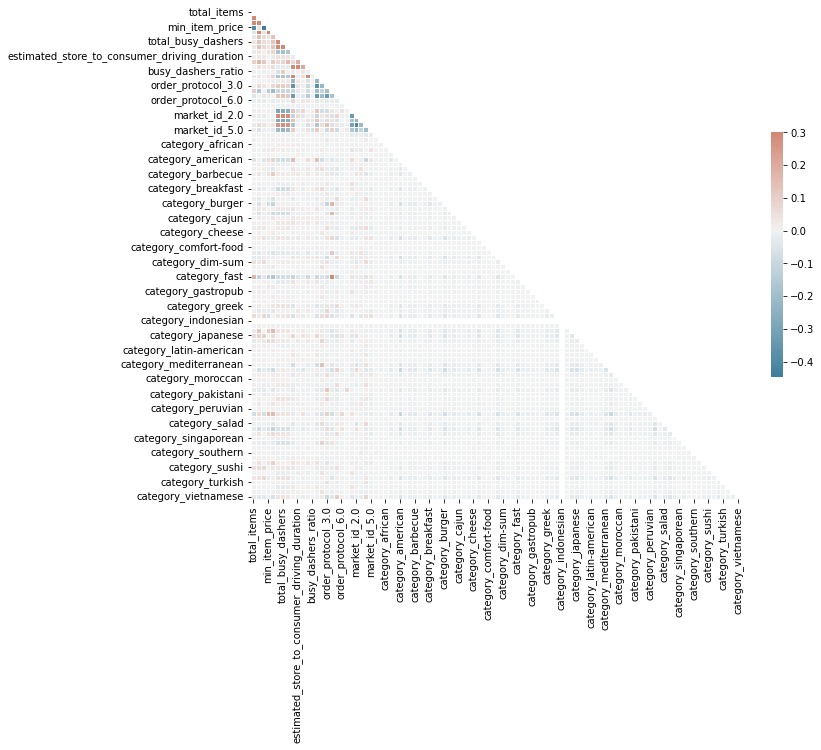

In [28]:
# To have a better visualization, we will take only one triangle because other triangle is only its sysmmetry (i.e a x b or b x a)

# Generating a mask 
corr = train_df.corr() # compute pairwise correlation among columns
mask = np.triu(np.ones_like(corr, dtype = bool))  
# The np.triu() function is used to return upper triangle of an array
# The ones_like() function is used to get an array of ones with the same shape and type as a given array.

# Setting up the matplotlib figure
f, ax = plt.subplots(figsize = (11,9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap = True)

# Drawing the heatmap with the mask and correcting aspect ratio
sns.heatmap(corr, mask = mask, cmap = cmap, vmax = .3, center = 0,
           square = True, linewidths = .5, cbar_kws = {"shrink": .5})

In [29]:
# Noticing the weak corelated feature 'category_indonesian'
train_df['category_indonesian'].describe()

count    177070.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: category_indonesian, dtype: float64

It has a zero standard deviation value. We can drop it because it does not bring any knowledge to the model.

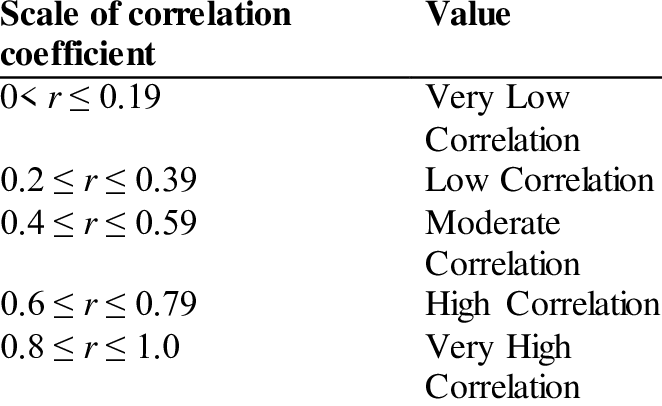

#### In general, it is recommended to avoid having correlated features in the dataset. Indeed, a group of highly correlated feature will not bring additional information (or just very few), but will increase the complexity of the algorithm, thus increasing the risk of errors.

In [30]:
# Define get_redundant_pairs and get_top_abs_correlations functions

def get_redundant_pairs(df):
    # Get diagonal and lower triangular pairs of corellation matrix
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop
def get_top_abs_correlations(df, n):
    # Sort correlations in the descending order and return n highest results
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels = labels_to_drop).sort_values(ascending = False)
    return au_corr[0:n]

print('Top Absolute Correlations')
print(get_top_abs_correlations(train_df, 20))

Top Absolute Correlations
total_onshift_dashers                         total_busy_dashers             0.941741
                                              total_outstanding_orders       0.934639
total_busy_dashers                            total_outstanding_orders       0.931295
estimated_store_to_consumer_driving_duration  estimated_non_prep_duration    0.923086
estimated_order_place_duration                order_protocol_1.0             0.897645
total_items                                   num_distinct_items             0.758146
subtotal                                      num_distinct_items             0.682890
total_items                                   subtotal                       0.557175
min_item_price                                max_item_price                 0.541241
subtotal                                      max_item_price                 0.507947
order_protocol_4.0                            category_fast                  0.489946
num_distinct_items          

In [31]:
# dropping created_at, market_id, store_id, store_primary_category, actual_delivery_time, order_protocol
train_df = historical_data.drop(columns = ['created_at', 'market_id', 'store_id', 'store_primary_category',
                                           'actual_delivery_time','nan_free_store_primary_category', 'order_protocol'])
train_df = pd.concat([train_df, order_protocol_dummies, store_primary_category_dummies], axis = 1)
# dropping highly correlatedly features
train_df = train_df.drop(columns = ['total_onshift_dashers', 'total_busy_dashers',
                                    'category_indonesian', 'estimated_non_prep_duration'])

# aligning dtype over dataset
train_df = train_df.astype('float32')
# replacing inf values with nan to drop all nans
train_df.replace([np.inf, -np.inf], np.nan, inplace = True)
train_df.dropna(inplace = True)
train_df.head(10)

,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,actual_total_delivery_duration,busy_dashers_ratio,...,category_southern,category_spanish,category_steak,category_sushi,category_tapas,category_thai,category_turkish,category_vegan,category_vegetarian,category_vietnamese
0,4.0,3441.0,4.0,557.0,1239.0,21.0,446.0,861.0,3779.0,0.424242,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1900.0,1.0,1400.0,1400.0,2.0,446.0,690.0,4024.0,2.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1900.0,1.0,1900.0,1900.0,0.0,446.0,690.0,1781.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6.0,6900.0,5.0,600.0,1800.0,2.0,446.0,289.0,3075.0,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.0,3900.0,3.0,1100.0,1600.0,9.0,446.0,650.0,2390.0,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,3.0,5000.0,3.0,1500.0,1900.0,2.0,446.0,338.0,2300.0,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,2.0,3900.0,2.0,1200.0,2700.0,9.0,446.0,638.0,1584.0,0.900000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,4.0,4850.0,4.0,750.0,1800.0,7.0,446.0,626.0,1965.0,1.142857,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,4.0,4771.0,3.0,820.0,1604.0,18.0,446.0,289.0,1586.0,0.750000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,2.0,2100.0,2.0,700.0,1200.0,2.0,446.0,715.0,3192.0,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
# Checking Absolute Correlation again
print('Top Absolute Correlation:')
print(get_top_abs_correlations(train_df, 20))

Top Absolute Correlation:
estimated_order_place_duration  order_protocol_1.0    0.897645
total_items                     num_distinct_items    0.758146
subtotal                        num_distinct_items    0.682890
total_items                     subtotal              0.557175
min_item_price                  max_item_price        0.541241
subtotal                        max_item_price        0.507947
order_protocol_4.0              category_fast         0.489946
num_distinct_items              min_item_price        0.446733
total_items                     min_item_price        0.389277
order_protocol_1.0              order_protocol_3.0    0.373581
estimated_order_place_duration  order_protocol_3.0    0.364170
order_protocol_1.0              order_protocol_5.0    0.342345
estimated_order_place_duration  order_protocol_5.0    0.333291
order_protocol_3.0              order_protocol_5.0    0.332533
order_protocol_1.0              order_protocol_2.0    0.226903
estimated_order_place_duratio

In [33]:
# drop created_at, market_id, store_id, store_primary_category, actual_delivery_time, order_protocol
train_df = historical_data.drop(columns = ["created_at", "market_id", "store_id", "store_primary_category", "actual_delivery_time", 
                                        "nan_free_store_primary_category", "order_protocol"])
# don't concat order_protocol_dummies
train_df = pd.concat([train_df, store_primary_category_dummies], axis=1)
train_df = train_df.drop(columns=["total_onshift_dashers", "total_busy_dashers",
                                  "category_indonesian", 
                                  "estimated_non_prep_duration"])
# align dtype over dataset
train_df = train_df.astype("float32")
# replace inf values with nan to drop all nans
train_df.replace([np.inf, -np.inf], np.nan, inplace=True)
train_df.dropna(inplace=True)
train_df.head()

,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,actual_total_delivery_duration,busy_dashers_ratio,...,category_southern,category_spanish,category_steak,category_sushi,category_tapas,category_thai,category_turkish,category_vegan,category_vegetarian,category_vietnamese
0,4.0,3441.0,4.0,557.0,1239.0,21.0,446.0,861.0,3779.0,0.424242,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1900.0,1.0,1400.0,1400.0,2.0,446.0,690.0,4024.0,2.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1900.0,1.0,1900.0,1900.0,0.0,446.0,690.0,1781.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6.0,6900.0,5.0,600.0,1800.0,2.0,446.0,289.0,3075.0,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.0,3900.0,3.0,1100.0,1600.0,9.0,446.0,650.0,2390.0,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
print("Top Absolute Correlations")
print(get_top_abs_correlations(train_df, 20))

Top Absolute Correlations
total_items                                   num_distinct_items                0.758146
subtotal                                      num_distinct_items                0.682890
total_items                                   subtotal                          0.557175
min_item_price                                max_item_price                    0.541241
subtotal                                      max_item_price                    0.507947
num_distinct_items                            min_item_price                    0.446733
total_items                                   min_item_price                    0.389277
estimated_store_to_consumer_driving_duration  actual_total_delivery_duration    0.188418
subtotal                                      actual_total_delivery_duration    0.172312
total_outstanding_orders                      estimated_order_place_duration    0.171049
total_items                                   category_fast                     0.17

Still, we have some highly correlated features (total_items, num_distinct_items,...) Total items and number of distinct items can affect the duration of preparation process so we do not prefer to drop them. So we think of using the feature engineering. We will create new columns to infer the contribution of these columns.

In [35]:
# new features
train_df['percent_distinct_items_to_total'] = train_df['num_distinct_items']/ train_df['total_items']
train_df['avg_price_per_item'] = train_df['subtotal']/ train_df['total_items']
train_df.drop(columns = ['num_distinct_items', 'subtotal'], inplace = True)
print('Top Absolute Correlations:')
print(get_top_abs_correlations(train_df, 20))

Top Absolute Correlations:
min_item_price                                avg_price_per_item                 0.860580
max_item_price                                avg_price_per_item                 0.770382
min_item_price                                max_item_price                     0.541241
total_items                                   percent_distinct_items_to_total    0.445751
                                              min_item_price                     0.389277
                                              avg_price_per_item                 0.310759
percent_distinct_items_to_total               avg_price_per_item                 0.226711
category_pizza                                avg_price_per_item                 0.225510
estimated_store_to_consumer_driving_duration  actual_total_delivery_duration     0.188418
max_item_price                                percent_distinct_items_to_total    0.178021
category_fast                                 avg_price_per_item         

In [36]:
# new features
train_df['price_ranges_of_items'] = train_df['max_item_price'] - train_df['min_item_price']
train_df.drop(columns = ['max_item_price', 'min_item_price'], inplace = True)
print('Top Absolute Correlations:')
print(get_top_abs_correlations(train_df, 20))

Top Absolute Correlations:
total_items                                   percent_distinct_items_to_total    0.445751
                                              price_ranges_of_items              0.333304
                                              avg_price_per_item                 0.310759
percent_distinct_items_to_total               avg_price_per_item                 0.226711
category_pizza                                avg_price_per_item                 0.225510
estimated_store_to_consumer_driving_duration  actual_total_delivery_duration     0.188418
category_fast                                 avg_price_per_item                 0.175950
total_outstanding_orders                      estimated_order_place_duration     0.171049
total_items                                   category_fast                      0.170988
category_italian                              avg_price_per_item                 0.158193
total_outstanding_orders                      actual_total_delivery_durat

There is no longer highly correlated features.

## Multicollinearity check
A variance inflation factor(VIF) detects multicollinearity in regression analysis. Multicollinearity is when there’s correlation between predictors (i.e. independent variables) in a model; it’s presence can adversely affect your regression results. The VIF estimates how much the variance of a regression coefficient is inflated due to multicollinearity in the model.
### Interpreting the Variance Inflation Factor
Variance inflation factors range from 1 upwards. The numerical value for VIF tells you (in decimal form) what percentage the variance (i.e. the standard error squared) is inflated for each coefficient. For example, a VIF of 1.9 tells you that the variance of a particular coefficient is 90% bigger than what you would expect if there was no multicollinearity — if there was no correlation with other predictors.
A rule of thumb for interpreting the variance inflation factor:

1 = not correlated.
Between 1 and 5 = moderately correlated.
Greater than 5 = highly correlated.

What is known is that the more your VIF increases, the less reliable your regression results are going to be. In general, a VIF above 10 indicates high correlation and is cause for concern. Some authors suggest a more conservative level of 2.5 or above.

Sometimes a high VIF is no cause for concern at all. For example, you can get a high VIF by including products or powers from other variables in your regression, like x and x2. If you have high VIFs for dummy variables representing nominal variables with three or more categories, those are usually not a problem.

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [38]:
def compute_vif(features):
    # Computing VIF score using variance_inflation_factor() function
    vif_data = pd.DataFrame()
    vif_data['feature'] = features
    vif_data['VIF'] = [variance_inflation_factor(train_df[features].values, i) for i in range(len(features))]
    return vif_data.sort_values(by = ['VIF']).reset_index(drop = True)

In [39]:
# Applying VIF computation to all columns
features = train_df.drop(columns = ['actual_total_delivery_duration']).columns.to_list()
vif_data = compute_vif(features)
vif_data

,feature,VIF
0,category_alcohol-plus-food,1.000369
1,category_chocolate,1.000488
2,category_belgian,1.000749
3,category_russian,1.003225
4,category_african,1.003820
...,...,...
76,busy_dashers_ratio,6.369592
77,category_american,7.033601
78,estimated_store_to_consumer_driving_duration,7.210812
79,estimated_order_place_duration,13.472106


In [40]:
# Dropping features with high VIF score until all VIF scores are under 20
multicollinearity = True

while multicollinearity:
    highest_vif_feature = vif_data['feature'].values[-1]
    print(highest_vif_feature)
    for i in features:
        if i == highest_vif_feature:
            features.remove(i)
    vif_data = compute_vif(features)
    multicollinearity = False if len(vif_data[vif_data.VIF > 20]) == 0 else True

selected_features = vif_data['feature'].values.tolist()
vif_data

    


percent_distinct_items_to_total


,feature,VIF
0,category_alcohol-plus-food,1.000221
1,category_chocolate,1.000361
2,category_belgian,1.000451
3,category_russian,1.002016
4,category_gluten-free,1.002363
...,...,...
75,category_american,4.505927
76,avg_price_per_item,5.958952
77,busy_dashers_ratio,6.357882
78,estimated_store_to_consumer_driving_duration,7.192612


## Feature Selection

In [41]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Using features that are selected in multicollinearity check point
X = train_df[selected_features]
y = train_df['actual_total_delivery_duration']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 42)


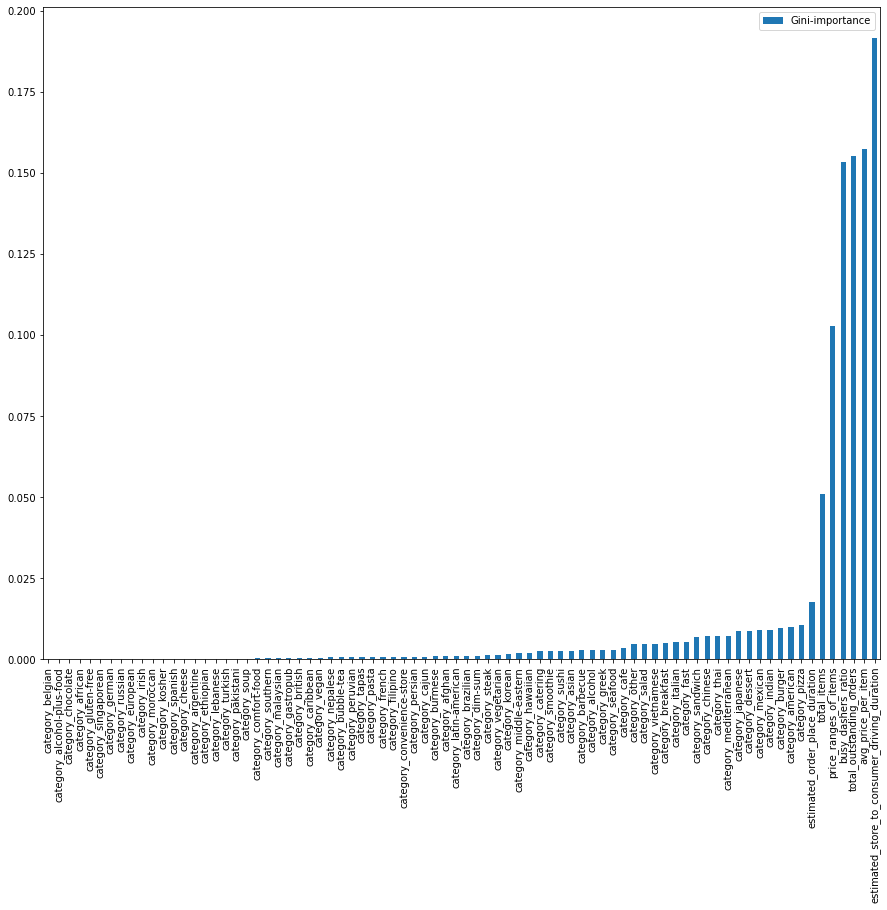

In [42]:
feature_names = [f'feature {i}' for i in range((X.shape[1]))]
forest = RandomForestRegressor(random_state = 42)
forest.fit(X_train, y_train)
feats = {}    #a dict to hold feature_name: feature_importance
for feature, importance in zip(X.columns, forest.feature_importances_):
    feats[feature] = importance  #add the name/value pair
    
importances = pd.DataFrame.from_dict(feats, orient = 'index').rename(columns = {0: 'Gini-importance'})
importances.sort_values(by = 'Gini-importance').plot(kind = 'bar', rot = 90, figsize = (15,12))
plt.show()

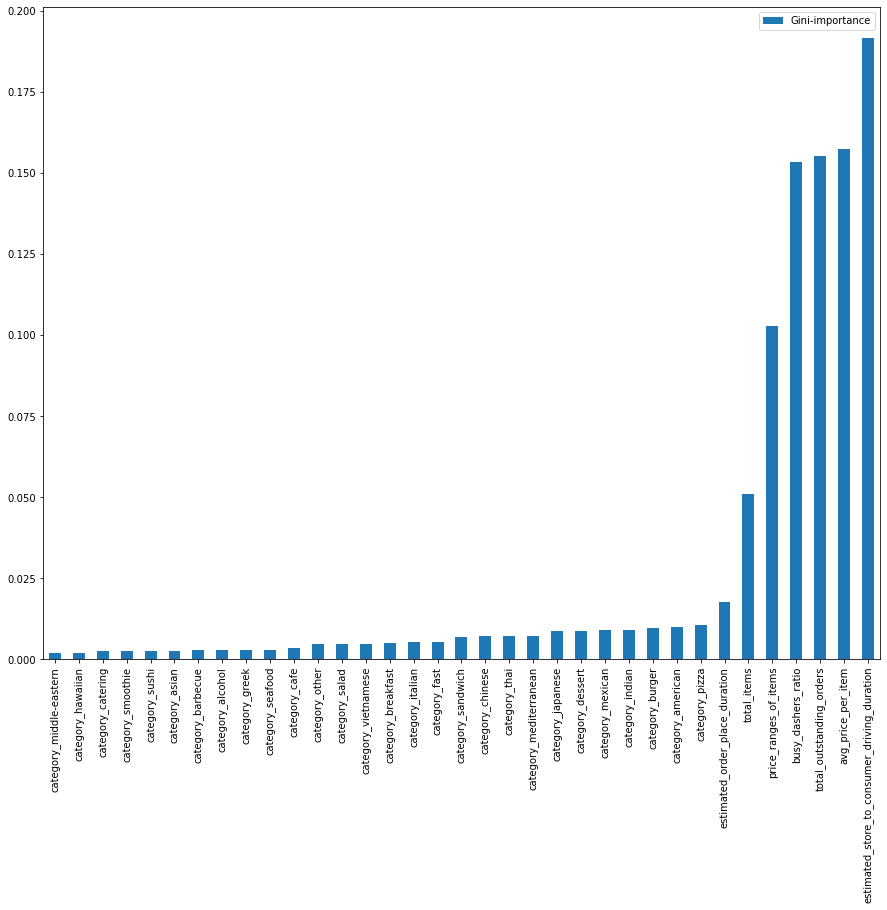

In [43]:
# checking the most important features
importances.sort_values(by = 'Gini-importance')[-35:].plot(kind = 'bar', rot = 90, figsize = (15,12))
plt.show()

In [44]:
# we can obtain the column names 
importances.sort_values(by = 'Gini-importance')[-35:].index.tolist()

['category_middle-eastern',
 'category_hawaiian',
 'category_catering',
 'category_smoothie',
 'category_sushi',
 'category_asian',
 'category_barbecue',
 'category_alcohol',
 'category_greek',
 'category_seafood',
 'category_cafe',
 'category_other',
 'category_salad',
 'category_vietnamese',
 'category_breakfast',
 'category_italian',
 'category_fast',
 'category_sandwich',
 'category_chinese',
 'category_thai',
 'category_mediterranean',
 'category_japanese',
 'category_dessert',
 'category_mexican',
 'category_indian',
 'category_burger',
 'category_american',
 'category_pizza',
 'estimated_order_place_duration',
 'total_items',
 'price_ranges_of_items',
 'busy_dashers_ratio',
 'total_outstanding_orders',
 'avg_price_per_item',
 'estimated_store_to_consumer_driving_duration']

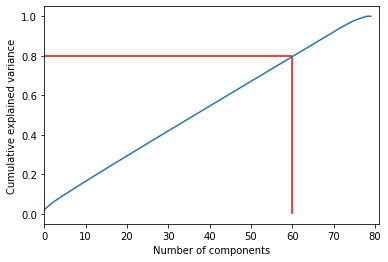

In [45]:
# applying PCA to see feature contributions
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X_Train = X_train.values
X_Train = np.asarray(X_Train)

# finding normalised array of X_Train
X_std = StandardScaler().fit_transform(X_Train)
pca = PCA().fit(X_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0, 81, 1)
plt.vlines(x = 60, color = 'r', ymin = 0, ymax = 0.8)
plt.hlines(y = 0.8, color = 'r', xmin = 0, xmax = 60)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

PCA shows that we need to use at least 60 representative features to explain 80% of the dataset, which makes the PCA transformation useless since we already have 80 and could select the most important ones based on feature importance. However, if PCA would tell us it can explain the majority of variance with around 10 features - high reduction - we would continue with it.

## Apply Scaler

In [46]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

def scale(scaler, X, y):
    # Applying the selected scaler to features and target variables
    X_scaler = scaler
    X_scaler.fit(X = X, y = y)
    X_scaled = X_scaler.transform(X)
    y_scaler = scaler
    y_scaler.fit(y.values.reshape(-1, 1))
    y_scaled = y_scaler.transform(y.values.reshape(-1,1))
    
    return X_scaled, y_scaled, X_scaler, y_scaler

In [47]:
# Applying scale function
X_scaled, y_scaled, X_scaler, y_scaler = scale(MinMaxScaler(), X, y)
print(X_scaled, y_scaled)

[[0.         0.         0.         ... 0.30509642 0.41235632 0.16427256]
 [0.         0.         0.         ... 0.34090909 0.33045977 0.16427256]
 [0.         0.         0.         ... 0.29545455 0.33045977 0.16427256]
 ...
 [0.         0.         0.         ... 0.31934732 0.38074713 0.09244936]
 [0.         0.         0.         ... 0.31818182 0.18390805 0.16427256]
 [0.         0.         0.         ... 0.31818182 0.06417625 0.16427256]] [[0.01106561]
 [0.01180272]
 [0.00505444]
 ...
 [0.00874599]
 [0.01145071]
 [0.00639928]]


In [48]:
# Train test spliting after scaling
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y_scaled, test_size =.2, random_state = 42)

## Inverse Transform for Metric Comparision
Since we apply a scaler to training data, the predictions for test data will also be scaled. And to see the error in terms of seconds, we need to apply the inverse transformation.
We will use Root Mean Squared Error to measure error. We could also use Mean Squared Error or Mean Absolute Error. We made our decision based on the sensitivity of RMSE for high error terms. In our thought, the consumer patience with delaying could decrease exponentially with time. 

The detailed comparison of MAE, MSE, RMSE could be found here: https://towardsdatascience.com/comparing-robustness-of-mae-mse-and-rmse-6d69da870828

In [49]:
from sklearn.metrics import mean_squared_error

def rmse_with_inv_transform(scaler, y_test, y_pred_scaled, model_name):
    ## Convert the scaled error to actual error
    y_predict = scaler.inverse_transform(y_pred_scaled.reshape(-1,1))
    ## Return RMSE with squared False
    rmse_error = mean_squared_error(y_test, y_predict[:, 0], squared = False)
    print("Error = "'{}'.format(rmse_error) + " in " + model_name)
    
    return rmse_error, y_predict

## Classical Machine Learning

In [50]:
# Creating a generic function which can work with multiple machine learning models:

def make_regression(X_train, y_train, X_test, y_test, model, model_name, verbose = True):
    ## Apply selected regression model to data and measure error
    model.fit(X_train, y_train)
    y_predict = model.predict(X_train)
    train_error = mean_squared_error(y_train, y_predict, squared = False)
    y_predict = model.predict(X_test)
    test_error = mean_squared_error(y_test, y_predict, squared = False)
    if verbose:
        print("Train error = "'{}'.format(train_error) + " in " + model_name)
        print("Test error = "'{}'.format(test_error) + " in " + model_name)
    trained_model = model
    
    return trained_model, y_predict, train_error, test_error

In [51]:
conda install -c conda-forge xgboost


Note: you may need to restart the kernel to use updated packages.


In [52]:
conda install -c conda-forge py-xgboost


Note: you may need to restart the kernel to use updated packages.


In [53]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.neural_network import MLPRegressor
from sklearn import tree
from sklearn import svm
from sklearn import neighbors
from sklearn import linear_model

pred_dict = {
    "regression_model": [],
    "feature_set": [],
    "scaler_name" : [],
    "RMSE": []
}


regression_models ={
    "Ridge": linear_model.Ridge(),
    "DecisionTree": tree.DecisionTreeRegressor(max_depth = 6),
    "RandomForest": RandomForestRegressor(),
    "XGBoost": XGBRegressor(),
    "LGBM": LGBMRegressor(),
    "MLP": MLPRegressor()
}

feature_sets = {
    "full_dataset": X.columns.to_list(),
    "selected_features_40": importances.sort_values(by = 'Gini-importance')[-40:].index.tolist(),
    "selected_features_20": importances.sort_values(by = 'Gini-importance')[-20:].index.tolist(),
    "selected_features_10": importances.sort_values(by = 'Gini-importance')[-10:].index.tolist()
}

scalers = {
    "Standard scaler": StandardScaler(),
    "MinMax Scaler": MinMaxScaler(),
    "NotScale": None
}

#Examine the error for each combination
for feature_set_name in feature_sets.keys():
    feature_set = feature_sets[feature_set_name]
    for scaler_name in scalers.keys():
        print(f"Scaled with {scaler_name} included columns are {feature_set_name}")
        for model_name in regression_models.keys():
            if scaler_name == "NotScale":
                X = train_df[feature_set]
                y = train_df["actual_total_delivery_duration"]
                X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 42)
                make_regression(X_train, y_train, X_test, y_test, regression_models[model_name], model_name, verbose = True)
            else:
                X_scaled, y_scaled, X_scaler, y_scaler = scale(scalers[scaler_name], X[feature_set], y)
                X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y_scaled,
                                                                                               test_size = .2, random_state = 42)
                _, y_predict_scaled, _, _ = make_regression(X_train_scaled, y_train_scaled[:,0], X_test_scaled, y_test_scaled[:,0],
                                                           regression_models[model_name], model_name, verbose = True)
                rmse_error, y_predict = rmse_with_inv_transform(y_scaler, y_test, y_predict_scaled, model_name)

            pred_dict["regression_model"].append(model_name)
            pred_dict["feature_set"].append(feature_set_name)
            pred_dict["scaler_name"].append(scaler_name)
            pred_dict["RMSE"].append(rmse_error)
                                                                                       
                
                

Scaled with Standard scaler included columns are full_dataset
Train error = 0.7679632280513232 in Ridge
Test error = 1.4719302095463795 in Ridge
Error = 2053.698549780668 in Ridge
Train error = 0.7653021374840772 in DecisionTree
Test error = 1.4744739396998416 in DecisionTree
Error = 2057.2476684096064 in DecisionTree
Train error = 0.2845616527652253 in RandomForest
Test error = 1.468393066860874 in RandomForest
Error = 2048.763380465929 in RandomForest
Train error = 0.6924042483535007 in XGBoost
Test error = 1.4594365603736243 in XGBoost
Error = 2036.2668882762127 in XGBoost
Train error = 0.7297768825541834 in LGBM
Test error = 1.4574073012159003 in LGBM
Error = 2033.4355810723252 in LGBM
Train error = 0.7389556522670757 in MLP
Test error = 1.461028573419874 in MLP
Error = 2038.4881314075435 in MLP
Scaled with MinMax Scaler included columns are full_dataset
Train error = 0.0032242184866240324 in Ridge
Test error = 0.0061795491688083565 in Ridge
Error = 2053.9647322776905 in Ridge
Trai

D:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Train error = 1053.0363040134564 in MLP
Test error = 2046.4667174562683 in MLP
Scaled with Standard scaler included columns are selected_features_40
Train error = 0.7685800171583174 in Ridge
Test error = 1.4721492777552725 in Ridge
Error = 2054.004202901983 in Ridge
Train error = 0.7653050291234431 in DecisionTree
Test error = 1.4739589994313642 in DecisionTree
Error = 2056.529202224364 in DecisionTree
Train error = 0.2850929921548688 in RandomForest
Test error = 1.4674248936844467 in RandomForest
Error = 2047.412544783999 in RandomForest
Train error = 0.6926604775025631 in XGBoost
Test error = 1.4589257281637606 in XGBoost
Error = 2035.5541532099026 in XGBoost
Train error = 0.7293252753717401 in LGBM
Test error = 1.4582804956619961 in LGBM
Error = 2034.6538984599247 in LGBM
Train error = 0.7398587442674377 in MLP
Test error = 1.4598166213916892 in MLP
Error = 2036.7971652825572 in MLP
Scaled with MinMax Scaler included columns are selected_features_40
Train error = 0.00322680530744185

D:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Train error = 1054.930780899572 in MLP
Test error = 2047.6022548571889 in MLP
Scaled with Standard scaler included columns are selected_features_20
Train error = 0.7701221891122231 in Ridge
Test error = 1.4731250237647895 in Ridge
Error = 2055.3656045171565 in Ridge
Train error = 0.7662722643089452 in DecisionTree
Test error = 1.472583688672633 in DecisionTree
Error = 2054.610311170708 in DecisionTree
Train error = 0.28404627797307425 in RandomForest
Test error = 1.468198903146357 in RandomForest
Error = 2048.492475136086 in RandomForest
Train error = 0.6905713419859495 in XGBoost
Test error = 1.4604161079747306 in XGBoost
Error = 2037.6335937562217 in XGBoost
Train error = 0.730155921973217 in LGBM
Test error = 1.4592620360573219 in LGBM
Error = 2036.0233846443627 in LGBM
Train error = 0.7407255881929837 in MLP
Test error = 1.459910340182745 in MLP
Error = 2036.927925656949 in MLP
Scaled with MinMax Scaler included columns are selected_features_20
Train error = 0.0032332854424452434 i

D:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Train error = 1059.981669401587 in MLP
Test error = 2050.792298627057 in MLP
Scaled with Standard scaler included columns are selected_features_10
Train error = 0.7717142078058022 in Ridge
Test error = 1.473987063641137 in Ridge
Error = 2056.568358582823 in Ridge
Train error = 0.7663420088976927 in DecisionTree
Test error = 1.47257427451221 in DecisionTree
Error = 2054.597176140608 in DecisionTree
Train error = 0.2871924617936344 in RandomForest
Test error = 1.470828545884584 in RandomForest
Error = 2052.1614625941274 in RandomForest
Train error = 0.6992178108583234 in XGBoost
Test error = 1.4622814757039808 in XGBoost
Error = 2040.2362331504632 in XGBoost
Train error = 0.7331284495367745 in LGBM
Test error = 1.4607728679290213 in LGBM
Error = 2038.13136041913 in LGBM
Train error = 0.7490808374262603 in MLP
Test error = 1.4628432238969806 in MLP
Error = 2041.0200075991056 in MLP
Scaled with MinMax Scaler included columns are selected_features_10
Train error = 0.0032399907662918758 in R

D:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Train error = 1060.3870580443975 in MLP
Test error = 2050.8316660793485 in MLP


It seems we have high errors through all models. When we examine the model performances, the most significant thing is the error rates. We need to try out different way to predict the total delivery duration.

In [54]:
train_df['prep_time'] = train_df['actual_total_delivery_duration'] - train_df['estimated_store_to_consumer_driving_duration'] - train_df['estimated_order_place_duration']

#After examining, we realize that scaling does not affect the performane, so we continue to scale with only StandardScaler

scalers = {"Standard scaler": StandardScaler()}

feature_sets = {"selected_features_40": importances.sort_values(by = 'Gini-importance')[-40:].index.tolist()}

for feature_set_name in feature_sets.keys():
    feature_set = feature_sets[feature_set_name]
    for scaler_name in scalers.keys():
        print(f"Scale with {scaler_name} included columns are {feature_set_name}")
        for model_name in regression_models.keys():
            #drop 'estimated_store_to_consumer_driving_duration' and 'estimated_order_place_duration'
            X = train_df[feature_set].drop(columns = ['estimated_store_to_consumer_driving_duration', 'estimated_order_place_duration'])
            y = train_df['prep_time']
            
            # geting indices
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 42)
            train_indices = X_train.index
            test_indices = X_test.index
            
            # scaling
            X_scaled, y_scaled, X_scaler, y_scaler = scale(scalers[scaler_name], X, y)
            
            
            X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y_scaled, test_size = .2, random_state = 42)
            _, y_predict_scaled, _,_ = make_regression(X_train_scaled, y_train_scaled[:,0], X_test_scaled, y_test_scaled[:,0],regression_models[model_name], model_name, verbose = False)
            rmse_error, y_predict = rmse_with_inv_transform(y_scaler, y_test, y_predict_scaled, model_name)
            
            pred_dict["regression_model"].append(model_name)
            pred_dict["feature_set"].append(feature_set_name)
            pred_dict["scaler_name"].append(scaler_name)
            pred_dict["RMSE"].append(rmse_error)
            
              

Scale with Standard scaler included columns are selected_features_40
Error = 2055.407522978242 in Ridge
Error = 2045.9600605603337 in DecisionTree
Error = 2046.9404300295969 in RandomForest
Error = 2037.826537590277 in XGBoost
Error = 2035.7236370513838 in LGBM
Error = 2038.6116350411914 in MLP


In [55]:
#Continuing with best performing model

scalers = {"Standard scaler": StandardScaler()}

feature_sets = {"selected_features_40": importances.sort_values(by = 'Gini-importance')[-40:].index.tolist()}

regression_models = {"LGBM": LGBMRegressor()}

for feature_set_name in feature_sets.keys():
    feature_set = feature_sets[feature_set_name]
    for scaler_name in scalers.keys():
        print(f"Scale with {scaler_name} included columns are {feature_set_name}")
        for model_name in regression_models.keys():
            X = train_df[feature_set].drop(columns = ["estimated_store_to_consumer_driving_duration", "estimated_order_place_duration"])
            y = train_df['prep_time']
            
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 42)
            train_indices = X_train.index
            test_indices = X_test.index
            
            #scaling
            X_scaled, y_scaled, X_scaler, y_scaler = scale(scalers[scaler_name], X, y)
            
            #applying indexing
            X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y_scaled, test_size = .2, random_state = 42)
            _, y_predict_scaled, _,_ = make_regression(X_train_scaled, y_train_scaled[:,0], X_test_scaled, y_test_scaled,
                                                      regression_models[model_name], model_name, verbose = False)
            rmse_error, y_predict = rmse_with_inv_transform(y_scaler, y_test, y_predict_scaled, model_name)
            
            pred_dict["regression_model"].append(model_name)
            pred_dict["feature_set"].append(feature_set_name)
            pred_dict["scaler_name"].append(scaler_name)
            pred_dict["RMSE"].append(rmse_error)
    

Scale with Standard scaler included columns are selected_features_40
Error = 2035.7236370513838 in LGBM


In [56]:
# Choosing the best performed model and extract the predictions for preparation duration
pred_values_dict = {
    "actual_total_delivery_duration": train_df["actual_total_delivery_duration"][test_indices].values.tolist(),
    "prep_duration_prediction": y_predict[:,0].tolist(),
    "estimated_store_to_consumer_driving_duration": train_df["estimated_store_to_consumer_driving_duration"][test_indices].values.tolist(),
    "estimated_order_place_duration": train_df["estimated_order_place_duration"][test_indices].values.tolist()
}

In [57]:
#Converting dictionary into dataframe
values_df = pd.DataFrame.from_dict(pred_values_dict)
values_df

,actual_total_delivery_duration,prep_duration_prediction,estimated_store_to_consumer_driving_duration,estimated_order_place_duration
0,2448.0,1734.115287,380.0,251.0
1,1839.0,1508.588146,747.0,446.0
2,1927.0,2141.085685,543.0,251.0
3,2657.0,1312.559865,445.0,251.0
4,3596.0,1945.871827,691.0,446.0
...,...,...,...,...
35409,9557.0,2623.132706,768.0,446.0
35410,1864.0,2148.159250,324.0,446.0
35411,2674.0,1939.286320,791.0,251.0
35412,2234.0,1930.656157,687.0,251.0


In [58]:
# Sum predictions up with non preparation activities such as order placing and driving
values_df["sum_total_delivery_duration"] = values_df["prep_duration_prediction"] + values_df["estimated_store_to_consumer_driving_duration"] + values_df["estimated_order_place_duration"]
values_df

,actual_total_delivery_duration,prep_duration_prediction,estimated_store_to_consumer_driving_duration,estimated_order_place_duration,sum_total_delivery_duration
0,2448.0,1734.115287,380.0,251.0,2365.115287
1,1839.0,1508.588146,747.0,446.0,2701.588146
2,1927.0,2141.085685,543.0,251.0,2935.085685
3,2657.0,1312.559865,445.0,251.0,2008.559865
4,3596.0,1945.871827,691.0,446.0,3082.871827
...,...,...,...,...,...
35409,9557.0,2623.132706,768.0,446.0,3837.132706
35410,1864.0,2148.159250,324.0,446.0,2918.159250
35411,2674.0,1939.286320,791.0,251.0,2981.286320
35412,2234.0,1930.656157,687.0,251.0,2868.656157


In [59]:
#Checking new error rate
mean_squared_error(values_df["actual_total_delivery_duration"], values_df["sum_total_delivery_duration"], squared = False)


2035.7236370513838

In [60]:
# using another regression to obtain the actual total delivery duration
X = values_df[["prep_duration_prediction", "estimated_store_to_consumer_driving_duration", "estimated_order_place_duration"]]
y = values_df["actual_total_delivery_duration"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 42)

In [61]:
regression_models = {
    "LinearReg" : linear_model.LinearRegression(),
    "Ridge" : linear_model.Ridge(),
    "DecisionTree" : tree.DecisionTreeRegressor(max_depth=6),
    "RandomForest" : RandomForestRegressor(),
    "XGBoost": XGBRegressor(),
    "LGBM": LGBMRegressor(),
    "MLP":  MLPRegressor(),
}
for model_name in regression_models.keys():
    _, y_predict, _, _= make_regression(
        X_train, y_train, X_test, y_test,regression_models[model_name], model_name, verbose=False)
    print("RMSE of:",model_name, mean_squared_error(y_test,y_predict, squared=False))

RMSE of: LinearReg 986.6912510221224
RMSE of: Ridge 986.6912510262307
RMSE of: DecisionTree 1235.578088153976
RMSE of: RandomForest 1136.5211716411955
RMSE of: XGBoost 1370.412425918564
RMSE of: LGBM 1079.2949179771774
RMSE of: MLP 987.0641472533649


We have better performance with this approach so we can choose this as final solution.

## Deep Learning
I wonder whether Artificial Neural Network could have a better performance for this problem so I want to try it out. 

In [69]:
conda install -c conda-forge keras


Note: you may need to restart the kernel to use updated packages.


In [73]:
# Dependencies
import keras
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
tf.random.set_seed(42)


#Neural network
def create_model(feature_set_size):
    # define a model
    model = Sequential()
    model.add(Dense(16, input_dim = feature_set_size, activation = 'relu'))
    model.add(Dense(1, activation = 'linear'))
    
    #compile the model
    model.compile(optimizer = 'sgd', loss = 'mse',
                 metrics = [tf.keras.metrics.RootMeanSquaredError()])
    return model

In [74]:
print(f"Scaled with {scaler_name} included columns are {feature_set_name}")
model_name = "ANN"
scaler_name = "Standard scaler"
X = values_df[["prep_duration_prediction", "estimated_store_to_consumer_driving_duration",
              "estimated_order_place_duration"]]
y = values_df["actual_total_delivery_duration"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 42)
X_scaled, y_scaled, X_scaler, y_scaler = scale(scalers[scaler_name], X, y)
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y_scaled, test_size = .2, random_state = 42)
print("feature_set_size:", X_train_scaled.shape[1])
model = create_model(feature_set_size = X_train_scaled.shape[1])
history = model.fit(X_train_scaled, y_train_scaled, epochs = 100, batch_size = 64, verbose = 1)
y_pred = model.predict(X_test_scaled)
rmse_error = rmse_with_inv_transform(y_scaler, y_test, y_pred, model_name)

pred_dict["regression_model"].append(model_name)
pred_dict["feature_set"].append(feature_set_name)
pred_dict["scaler_name"].append(scaler_name)
pred_dict["RMSE"].append(rmse_error)

Scaled with Standard scaler included columns are selected_features_40
feature_set_size: 3
Epoch 1/100
443/443 [==============================] - 2s 2ms/step - loss: 1.1532 - root_mean_squared_error: 1.0739
Epoch 2/100
443/443 [==============================] - 1s 2ms/step - loss: 1.1221 - root_mean_squared_error: 1.0593
Epoch 3/100
443/443 [==============================] - 1s 2ms/step - loss: 1.1198 - root_mean_squared_error: 1.0582
Epoch 4/100
443/443 [==============================] - 1s 2ms/step - loss: 1.1194 - root_mean_squared_error: 1.0580
Epoch 5/100
443/443 [==============================] - 1s 2ms/step - loss: 1.1188 - root_mean_squared_error: 1.0578
Epoch 6/100
443/443 [==============================] - 1s 2ms/step - loss: 1.1190 - root_mean_squared_error: 1.0578
Epoch 7/100
443/443 [==============================] - 1s 2ms/step - loss: 1.1187 - root_mean_squared_error: 1.0577
Epoch 8/100
443/443 [==============================] - 1s 2ms/step - loss: 1.1184 - root_mean_squa

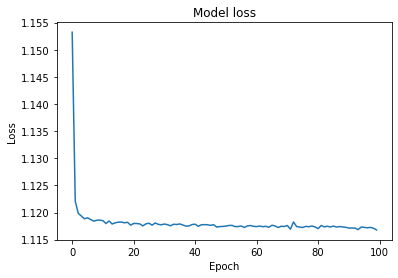

In [75]:
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')A
plt.xlabel('Epoch')
plt.show()

We achieved the same performance with the MLP method of sklearn. It could be possible to improve the performance a bit more with hyperparameter tuning in ANN, however, it requires considerable time and effort. We leave our official solution as LGBM + Linear Regression on top.